In [2]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt

In [74]:
# Borrowed from the collision avoidance notebook
class Circle:
    
    radius = 0
    center = 0
    
    def __init__(self, center, radius):
        
        self.center = center
        self.radius = radius
        
        return
    
    def distance(self, point):
        
        return np.linalg.norm(point - self.center) - self.radius
    
    # Returns the points on the line segment and circle that are closest together
    # Line segment runs between l1 and l2
    def line_distance(self, l1, l2):
                
        # find closest distance between line and center of the circle
        length_squared = (l2 - l1) @ (l2 - l1)
        
        t = max(0, min(1, (self.center - l1) @ (l2 - l1) / length_squared))
        
        line_point = l1 + t * (l2 - l1)
        
        distance = np.linalg.norm(line_point - self.center)
                
        return distance
    
    
class PRM:
        
    def __init__(self, size):
        
        self.vertices = np.zeros((2,size))
        self.edges = np.zeros((size,size))
        
        self.vertices_active = np.ones((size,))
        self.edges_active = np.ones((size,size))
        
        self.obstacles = []
        
        self.size = size
        
        return
        
    # Generates a set of random vertices
    # Connnects the vertices that are within a certain distance of each other
    def generate(self):
        
        for i in range(0, self.size):
            
            self.vertices[:,i] = np.random.uniform(-5, 5, 2).T
            
        for i in range(0, self.size):
            
            for j in range(i+1, self.size):
                
                if (np.linalg.norm(self.vertices[:,i] - self.vertices[:,j]) < 0.7):
                    
                    self.edges[i, j] = 1
                    self.edges[j, i] = 1
                    
        return
    
    def plot(self):
        
        fig, ax = plt.subplots()

        ax.set_aspect( 1 )
        ax.set_xlim((-6,6))
        ax.set_ylim((-6,6))

        fig.set_figheight(15)
        fig.set_figwidth(15)
        
        for obs in self.obstacles:
    
            circle = plt.Circle(obs.center, obs.radius, color='y', fill=True)
            ax.add_artist(circle)

        # Draw vertices
        plt.scatter(self.vertices[0,:], self.vertices[1,:])
        
        # Draw edges
        for i in range(0, self.size):
            
            for j in range(i+1, self.size):
                
                if (self.edges[i,j] == 1):
                    
                    if (self.edges_active[i,j] == 1):
                    
                        plt.plot([self.vertices[0,i], self.vertices[0,j]], [self.vertices[1,i], self.vertices[1,j]], 'g')

        
                    else:
        
                        plt.plot([self.vertices[0,i], self.vertices[0,j]], [self.vertices[1,i], self.vertices[1,j]], 'r')
        
        plt.show()

        
        return
    
    # Resets the active flags to all be true
    # Deletes all obstacle data
    def reset_obstacles(self):
        
        self.vertices_active = np.ones((self.size,))
        self.edges_active = np.ones((self.size,self.size))
        self.obstacles = []
        
    
    def insert_obstacle(self, circle):
        
        self.obstacles.append(circle)
        
        for i in range(0, self.size):
            
            if (self.vertices_active[i] == 0): continue
            
            if (circle.distance(self.vertices[:,i]) < 0):
                
                self.vertices_active[i] = 0
                
                self.edges_active[:,i] = np.zeros((self.size,))
                self.edges_active[i,:] = np.zeros((self.size,)).T
                
        for i in range(0, self.size):
            
            for j in range(i+1, self.size):
                
                if (self.edges_active[i,j] == 0): continue
                
                if (circle.line_distance(self.vertices[:,i], self.vertices[:,j]) < 0):
                    
                    self.edges_active[i,j] = 0
                    self.edges_active[j,i] = 0
                
        return
    
    
    # Takes in the start and end points as indices
    # Uses the A* pathfinding algorithm
    def find_path(self, start, end):
            
        

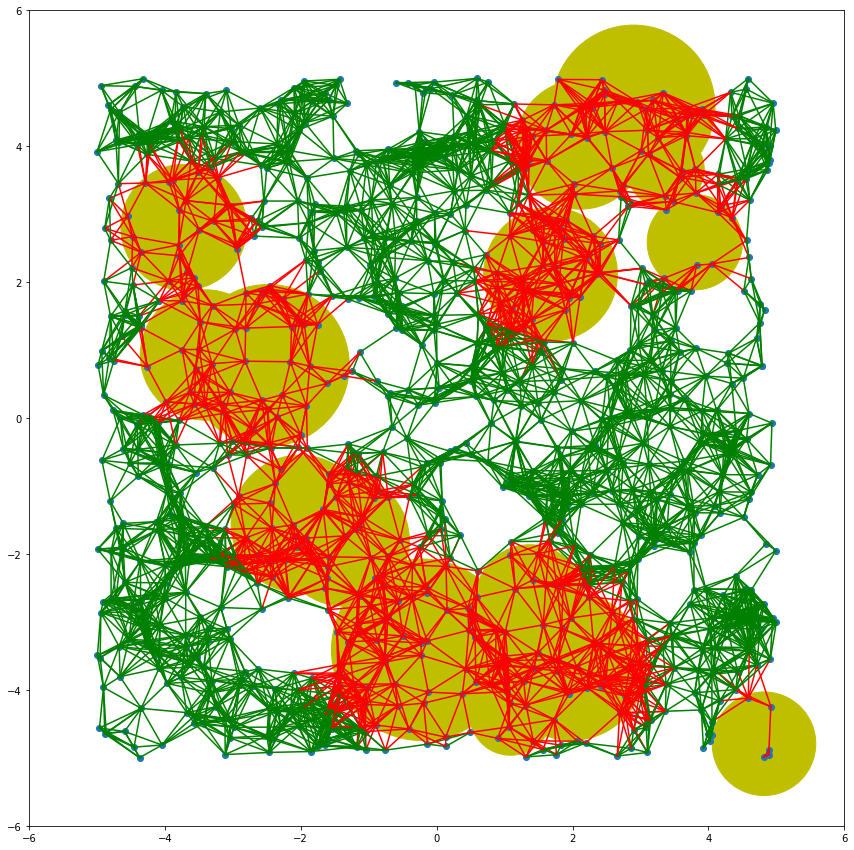

In [77]:
wsmap = PRM(1000)

wsmap.generate()

for i in range(15):
    wsmap.insert_obstacle(Circle(np.random.uniform(-5, 5, 2), np.random.uniform(0.5, 1.5)))

wsmap.plot()